## Feature Scaling

##### https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])

In [2]:
df

,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


### 1) Min-Max scaler

#### x_new = (x-x_min)/(x_max-x_min)  This Scaler shrinks the data within the range of -1 to 1 if there are negative values.
#### This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers
#### A popular application is image processing

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[0.625, 0.   ],
       [1.   , 0.5  ],
       [0.25 , 0.25 ],
       [0.   , 1.   ]])

In [5]:
# create new dataframe with scaled data
df_mm = pd.DataFrame(scaler.fit_transform(df),columns=['weight','price'],index=['Orange','Apple','Banana','Grape'])
df_mm

,weight,price
Orange,0.625,0.00
Apple,1.000,0.50
Banana,0.250,0.25
Grape,0.000,1.00


Text(0, 0.5, 'price')

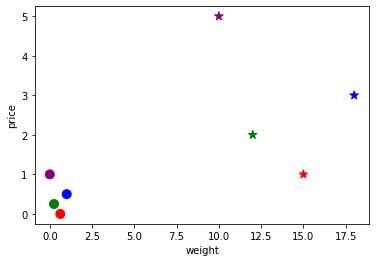

In [21]:
# plot 
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_mm['weight'],df_mm['price'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')


### 2) Standard Scaler

#### x_new = (x-mean)/Standard Deviation
#### Assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1. Centering and scaling happen independently on each feature. 
#### If data is not normally distributed, this is not the best Scaler to use. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.

In [10]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
s_scaler.fit_transform(df)

array([[ 0.41239305, -1.18321596],
       [ 1.40213637,  0.16903085],
       [-0.57735027, -0.50709255],
       [-1.23717915,  1.52127766]])

In [11]:
df_ss = pd.DataFrame(s_scaler.fit_transform(df),columns=['weight','price'],index=['Orange','Apple','Banana','Grape'])
df_ss

,weight,price
Orange,0.412393,-1.183216
Apple,1.402136,0.169031
Banana,-0.577350,-0.507093
Grape,-1.237179,1.521278


Text(0, 0.5, 'price')

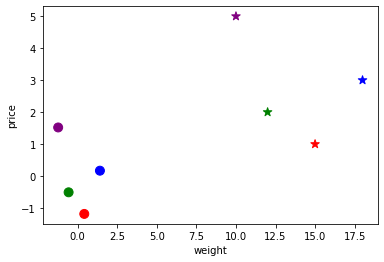

In [22]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_ss['weight'],df_ss['price'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')

### 3) Max Abs Scaler

#### Scale each feature by its maximum absolute value individually. set the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity. On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers. 每列数据除以该列最大值

In [13]:
from sklearn.preprocessing import MaxAbsScaler
m_scaler = MaxAbsScaler()
m_scaler.fit_transform(df)

array([[0.83333333, 0.2       ],
       [1.        , 0.6       ],
       [0.66666667, 0.4       ],
       [0.55555556, 1.        ]])

In [14]:
df_m = pd.DataFrame(m_scaler.fit_transform(df),columns=['weight','price'],index=['Orange','Apple','Banana','Grape'])

Text(0, 0.5, 'price')

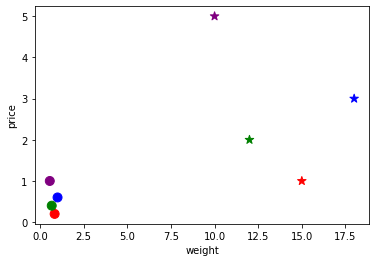

In [23]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_m['weight'],df_m['price'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')

### 4) Robust Scaler

#### This Scaler is robust to outliers. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range):range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)
#### The outliers are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

In [17]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
r_scaler.fit_transform(df)

array([[ 0.35294118, -0.85714286],
       [ 1.05882353,  0.28571429],
       [-0.35294118, -0.28571429],
       [-0.82352941,  1.42857143]])

In [18]:
df_r = pd.DataFrame(r_scaler.fit_transform(df),columns=['weight','price'],index=['Orange','Apple','Banana','Grape'])

Text(0, 0.5, 'price')

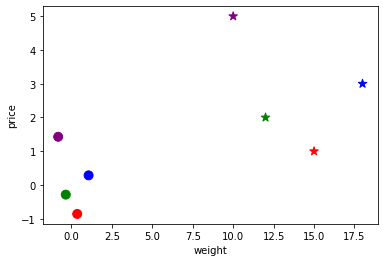

In [24]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_r['weight'],df_r['price'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')

### 5) Quantile Transformer Scaler

#### Transform features using quantiles（分位数） information. This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme. 最大值为1最小值为0
#### that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as Rank scaler.
#### Quantile transformer is useful when we have a large dataset with many data points usually more than 1000.

In [25]:
from sklearn.preprocessing import QuantileTransformer
q_scaler = QuantileTransformer()
q_scaler.fit_transform(df)

c:\users\liuha_oc1c\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


array([[0.66666667, 0.        ],
       [1.        , 0.66666667],
       [0.33333333, 0.33333333],
       [0.        , 1.        ]])

In [26]:
df_q = pd.DataFrame(q_scaler.fit_transform(df),columns=['weight','price'],index=['Orange','Apple','Banana','Grape'])

c:\users\liuha_oc1c\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Text(0, 0.5, 'price')

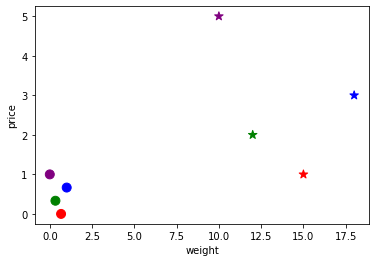

In [27]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_q['weight'],df_q['price'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')

### 6) Power Transformer Scaler

#### a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
#### This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired.

In [28]:
from sklearn.preprocessing import PowerTransformer
p_scaler = PowerTransformer(method='yeo-johnson')
p_scaler.fit_transform(df)

array([[ 0.50017981, -1.36808362],
       [ 1.32411615,  0.35824388],
       [-0.50440496, -0.35824882],
       [-1.31989099,  1.36808856]])

In [31]:
df_p = pd.DataFrame(p_scaler.fit_transform(df),columns=['weight','price'],index=['Orange','Apple','Banana','Grape'])

Text(0, 0.5, 'price')

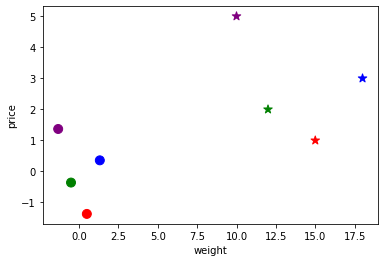

In [32]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_p['weight'],df_p['price'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')

### 7) Unit Vector Scaler

#### x_new = x/||x||
#### Scaling is done considering the whole feature vector to be of unit length. This usually means dividing each component by the Euclidean length of the vector (L2 Norm)
#### Like Min-Max Scaling, the Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.

In [33]:
# unit vector with L1 norm
df_v = df.apply(lambda x: x/np.linalg.norm(x,1))
df_v

,WEIGHT,PRICE
Orange,0.272727,0.090909
Apple,0.327273,0.272727
Banana,0.218182,0.181818
Grape,0.181818,0.454545


In [34]:
# unit vector with L2 norm
df_vec = df.apply(lambda x: x/np.linalg.norm(x,2))
df_vec

,WEIGHT,PRICE
Orange,0.532666,0.160128
Apple,0.639199,0.480384
Banana,0.426132,0.320256
Grape,0.355110,0.800641


Text(0, 0.5, 'price')

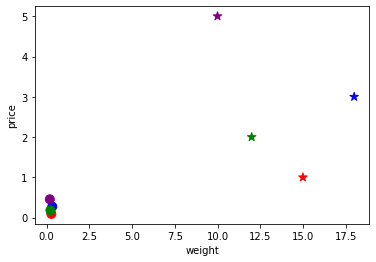

In [36]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_v['WEIGHT'],df_v['PRICE'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')

Text(0, 0.5, 'price')

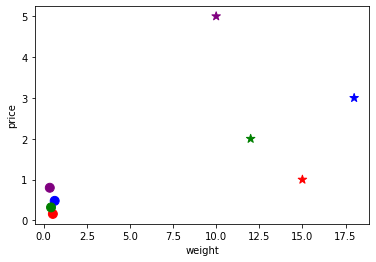

In [37]:
plt.scatter(df['WEIGHT'],df['PRICE'],color=['red','blue','green','purple'],marker='*',s=80,label='Before scaling')
plt.scatter(df_vec['WEIGHT'],df_vec['PRICE'],color=['red','blue','green','purple'],marker='o',s=80,label='After scaling')
plt.xlabel('weight')
plt.ylabel('price')